
# Project: TMDb movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,866 movies collected from The Movie Database (TMDb), including user ratings and revenue.  
This dataset has 2 columns which consists of:
* **id** - unique movie id
* **imdb_id** - unique movie id on the imdb database
* **popularity** - movie popularity rating(not sure about this)
* **budget** - the cost of movie production
* **revenue** - money generated from the movie
* **original_title** - movie title
* **cast** - movie crew/cast
* **homepage** - web page of the movie
* **director** - movie director
* **tagline** - short sentence about the movie
* **keywords** - words that can be related to the movie
* **overview** - movie description
* **runtime** - movie duration in mins
* **genres** - movie genre
* **production_companies** - companies involved in production
* **release_date** - release date of movie
* **vote_count** - number of votes
* **vote_average** - average/mean of the votes
* **release_year** - release year of movie
* **budget_adj** - updated/adjusted budget
* **revenue_adj** - updated/adjusted revenue


### Question(s) for Analysis 
1. Top 5 genre sell more/make the most profit?  
2. Top 3 Directors with the most profitable movies?  
3. Does high budget means high revenue?  
4. Does longer runtime movies take up more budget?
5. Top 5 Production companies with the highest revenue?

In [1]:
# importing the neccessary libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#show all available columns
pd.set_option('display.max_columns', None)

<a id='wrangling'></a>
# Data Wrangling



In [2]:
#Loading and assigning the dataset to a dataframe
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#viewing the firt few rows of the dataset
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment

In [4]:
#checking data type consistency
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

###### the data types seems to be okay for each column except for the adjusted revenue and budget which will have to be change to int, but we can see some missing/null values in some columns

In [5]:
#checking for missing or null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

###### 9 columns have missing/null values

In [6]:
#checking for duplicate rows
df.duplicated().sum()

1

###### 1 row with duplicates


### Data Cleaning
 

###### I'll start cleaning the dataset by dropping the columns not neccesary for this analysis such as:::
* **imdb_id**
* **budget**
* **revenue**
* **cast**
* **homepage**
* **tagline**
* **keywords**
* **overview**
* **vote_average**
* **release_date**

###### Reasons why I'll be dropping the above coumns
* **imdb_id** --> the movie id column will serve the same purpose as unique id for the movies.
* **budget** --> the adjusted budget is the updated version of this.
* **revenue** --> the adjusted revenue is the updated version of this.
* **cast** --> the names of the cast wont be used for this analysis in anyway.
* **homepage**  --> the webpage for the movies wont be used for this analysis in anyway.
* **tagline** --> the tagline wont be used as well for this analysis in anyway.
* **keywords**  --> the keywords wont be used for this analysis in anyway.
* **overview** --> the overview of the movies is not neccesary for this analysis in anyway.
* **vote_average** --> The vote count will be used instead and I could get the average when needed.
* **release_date** --> the release year will serve the same purpose

###### dropping the unnecessary columns

In [7]:
#listing the columns that will be dropped
cols = ['imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'vote_average']

In [8]:
#dropping the columns from the dataframe
df.drop(cols, axis = 1, inplace = True)

In [9]:
#checking to confirm that the coumns have been dropped
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,1.747999e+08,1.385749e+09


###### I'll be converting the adjusted revenue and budget back to int datatypes for consistency

In [10]:
#listing the columns to be converted
cols = ['budget_adj', 'revenue_adj']

In [11]:
#converting the columns to the appropriate data types
df[cols] = df[cols].astype(int)

In [12]:
#confirming the changes were made
df.dtypes

id                        int64
popularity              float64
original_title           object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
release_year              int64
budget_adj                int32
revenue_adj               int32
dtype: object

In [13]:
#viewing the change n the dataset
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,137999939,1392445892
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,137999939,348161292
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,101199955,271619025
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,183999919,1902723129
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,174799923,1385748801


###### I'll be dropping the NaN/null rows

In [14]:
#checking for the null values in each column
df.isnull().sum()

id                         0
popularity                 0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

I'll be dropping the above rows since those columns are not neccessary for the analysis

In [15]:
#dropping the null rows in the dataset
df.dropna(inplace = True)

In [16]:
#confirming the rows with missing values were dropped
df.isnull().sum()

id                      0
popularity              0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

###### I'll be adding a column for profit  to make things easier and cleaner

In [17]:
#calculating and adding the profit column
df['profit'] = df['revenue_adj'] - df['budget_adj']

In [18]:
#veiwing the dataset to confirm the change
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,137999939,1392445892,1254445953
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,137999939,348161292,210161353
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,101199955,271619025,170419070
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,183999919,1902723129,1718723210
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,174799923,1385748801,1210948878


In [19]:
#checking the general statistics of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,9807.0,6.328550e+04,9.080409e+04,5.000000e+00,10248.000000,18726.0000,7.058650e+04,4.178590e+05
popularity,9807.0,6.931335e-01,1.035473e+00,1.880000e-04,0.231584,0.4189,7.742040e-01,3.298576e+01
runtime,9807.0,1.027432e+02,2.813334e+01,0.000000e+00,90.000000,100.0000,1.120000e+02,8.770000e+02
vote_count,9807.0,2.386095e+02,6.020522e+02,1.000000e+01,18.000000,46.0000,1.720000e+02,9.767000e+03
release_year,9807.0,2.000891e+03,1.303203e+01,1.960000e+03,1994.000000,2005.0000,2.011000e+03,2.015000e+03
budget_adj,9807.0,1.935178e+07,3.562014e+07,0.000000e+00,0.000000,242304.0000,2.442295e+07,4.250000e+08
revenue_adj,9807.0,5.492437e+07,1.491133e+08,-2.147484e+09,0.000000,0.0000,4.249105e+07,1.907006e+09
profit,9807.0,3.732439e+07,1.282733e+08,-4.139124e+08,0.000000,0.0000,1.991191e+07,2.108194e+09


In [20]:
#we can notice a negative value in revenue_adj and some 0's in both revenue and budget columns. I'll fix that by dropping such rows
#another note on kaggle was that the rows with 0's are missing values
df = df[(df['revenue_adj'] > 0) & (df['budget_adj'] > 0)]

###### The data is clean now and ready for analysis

In [21]:
#viewing and cross-checking the data again
df.head()

,id,popularity,original_title,director,runtime,genres,production_companies,vote_count,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,2015,137999939,1392445892,1254445953
1,76341,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,2015,137999939,348161292,210161353
2,262500,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,2015,101199955,271619025,170419070
3,140607,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,2015,183999919,1902723129,1718723210
4,168259,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,2015,174799923,1385748801,1210948878


<a id='eda'></a>
## Exploratory Data Analysis


I'll check the general statistics of the dataset to see if there's anything interesting about the data

In [22]:
#checking the general statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3803.0,4.006079e+04,6.759524e+04,5.000000e+00,5.960500e+03,1.125800e+04,3.866200e+04,4.178590e+05
popularity,3803.0,1.197186e+00,1.463663e+00,1.033500e-02,4.702210e-01,8.075900e-01,1.381066e+00,3.298576e+01
runtime,3803.0,1.093090e+02,1.978777e+01,1.500000e+01,9.600000e+01,1.060000e+02,1.190000e+02,3.380000e+02
vote_count,3803.0,5.295580e+02,8.697648e+02,1.000000e+01,7.400000e+01,2.070000e+02,5.830000e+02,9.767000e+03
release_year,3803.0,2.001243e+03,1.131578e+01,1.960000e+03,1.995000e+03,2.004000e+03,2.010000e+03,2.015000e+03
budget_adj,3803.0,4.459661e+07,4.463967e+07,1.000000e+00,1.354637e+07,3.038360e+07,6.080350e+07,4.250000e+08
revenue_adj,3803.0,1.360832e+08,2.020134e+08,2.000000e+00,1.916146e+07,6.274580e+07,1.649303e+08,1.907006e+09
profit,3803.0,9.148663e+07,1.796534e+08,-4.139124e+08,-1.425532e+06,2.819881e+07,1.084531e+08,1.878643e+09


In [23]:
#formatting the result tomake them more easier to read
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [24]:
#checking the general statistics of the dataset again to confirm the change
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,3803.00000,40060.78701,67595.24412,5.00000,5960.50000,11258.00000,38662.00000,417859.00000
popularity,3803.00000,1.19719,1.46366,0.01034,0.47022,0.80759,1.38107,32.98576
runtime,3803.00000,109.30897,19.78777,15.00000,96.00000,106.00000,119.00000,338.00000
vote_count,3803.00000,529.55798,869.76478,10.00000,74.00000,207.00000,583.00000,9767.00000
release_year,3803.00000,2001.24349,11.31578,1960.00000,1995.00000,2004.00000,2010.00000,2015.00000
budget_adj,3803.00000,44596609.09177,44639666.06556,1.00000,13546369.00000,30383599.00000,60803495.00000,425000000.00000
revenue_adj,3803.00000,136083236.87747,202013433.05796,2.00000,19161463.00000,62745795.00000,164930318.00000,1907005841.00000
profit,3803.00000,91486627.78570,179653366.93120,-413912431.00000,-1425532.00000,28198810.00000,108453098.50000,1878643093.00000


###### From the general statistics we can take nnote of the following:

* The movie with the **lowest popularity** has a rating of **0.00019**
* The oldest movie in the dataset is from **1960**
* The shortest movie is **90mins** long
* The movie with the highest profit is **$2,108,194,372**
* We can see that negative values in the **profit** column meaning some movies really did not do well

## Answering the questions am intrested in for this analysis

#### FUNCTIONS

In [25]:
#Creating a funtion that will split categories into single rows for further analysis

def split_category(df_name, col_name, delimeter):
    df_name[col_name] = df_name[col_name].str.split(delimeter)
    df_name = df_name.explode(col_name)
    new_df = df_name
    return new_df
# df_name = the name of the dataframe we want to use the function on
# col_name = the column with the clustered categories of data
# delimeter = the delimeter/seperator of the categories


# The split_category function breaks down the columns by the delimeter first into a list and
# using the explode() function to further break the down into single rows

In [26]:
#function for my barchart template

def barchart(x, y, title, xlab, ylab):
    plt.figure(figsize = (15, 8))
    sns.barplot(x = x, y = y)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
# x = data for x axis
# y = data for y axis
# title = title of the chart
# xlab = x axis label
# ylab = y axis label

In [27]:
#function for my scatter plot template
def scatterplot(df_name, x, y, title, xlab, ylab):
    df_name.plot.scatter(y = y, x = x, figsize = (12, 8))
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    
# df_name = the name of the dataframe
# x = data for x axis
# y = data for y axis
# title = title of the chart
# xlab = x axis label
# ylab = y axis label

## 1. Top 5 genre sell more/make the most profit? 

In [28]:
#I'll create a copy of the data with the columns I need
genre_profit = df[['genres', 'profit']]

In [29]:
#view data
genre_profit.head()

,genres,profit
0,Action|Adventure|Science Fiction|Thriller,1254445953
1,Action|Adventure|Science Fiction|Thriller,210161353
2,Adventure|Science Fiction|Thriller,170419070
3,Action|Adventure|Science Fiction|Fantasy,1718723210
4,Action|Crime|Thriller,1210948878


In [30]:
#splitting the clustered genres into single rows
genre_profit = split_category(df_name = genre_profit, col_name = 'genres', delimeter = '|')

C:\Users\Phantom\AppData\Local\Temp/ipykernel_12744/3040909193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_name[col_name] = df_name[col_name].str.split(delimeter)


In [31]:
#viewing the new data
genre_profit.head()

,genres,profit
0,Action,1254445953
0,Adventure,1254445953
0,Science Fiction,1254445953
0,Thriller,1254445953
1,Action,210161353


In [32]:
#grouping the data now by the genres and getting the sum of the profits for each genre
genre_profit = genre_profit.groupby('genres').sum()

In [33]:
#sorting to get the top 5
genre_profit = genre_profit.sort_values(by = 'profit', ascending = False)
genre_profit = genre_profit.head(5)

In [34]:
#viewing the top 5 profitable genres 
genre_profit

,profit
genres,
Adventure,137105949772.00000
Action,134488495526.00000
Drama,112636548020.00000
Comedy,111503231991.00000
Thriller,96180665125.00000


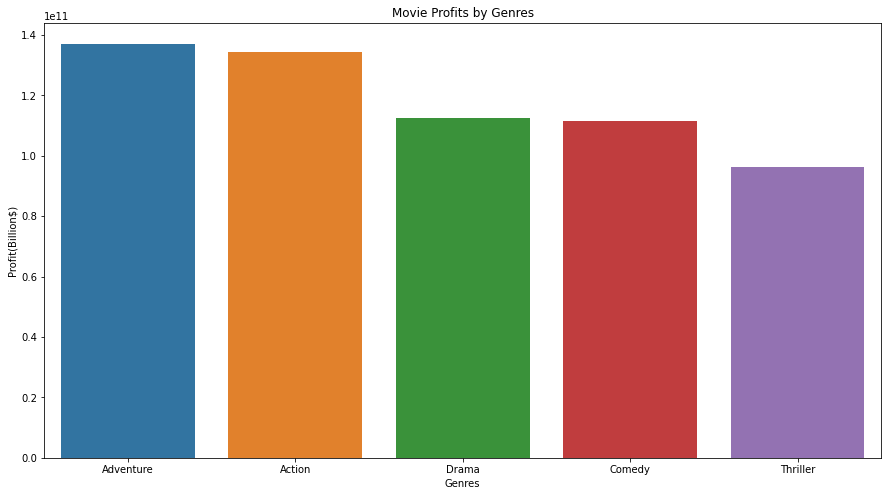

In [35]:
#creating a bar chart to represent the table above
barchart(x = genre_profit.index, y = genre_profit['profit'],
         title = 'Movie Profits by Genres',
         xlab = 'Genres', ylab = 'Profit(Billion$)')

It came as a surprise to me to see **ADVENTURE** as the most profitable at almost 140 billion $ I was expecting to see **ACTION**

## 2. Top 3 Directors with the most profitable movies? 

In [36]:
#creating a subset of the dataframe with the columns I need to answer this question
directors = df[['director', 'profit']]

In [37]:
#I'll like to add a count of the movies directed by each of the directors
directors = directors.groupby('director').agg(movie_count = ('director' , 'count'), profits = ('profit' , 'sum'))

In [38]:
#sorting by the highest profits made by directors
directors = directors.sort_values(by = 'profits', ascending = False)

In [39]:
#getting the top 3 directors
directors = directors.head(3)

In [40]:
#restting the index so tthe name of the directors will be an actual column
directors = directors.reset_index()

In [41]:
#viewing the dataset
directors

,director,movie_count,profits
0,Steven Spielberg,27,13126025232.00000
1,Peter Jackson,11,5645491691.00000
2,Robert Zemeckis,15,4335995167.00000


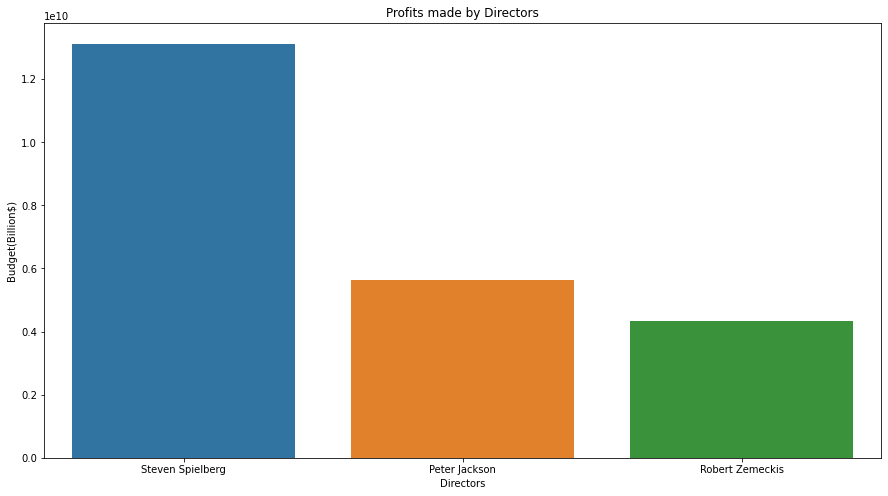

In [42]:
#creating a bar vhart to represent the table above
barchart(x = directors['director'], y = directors['profits'],
         title = 'Profits made by Directors', 
         xlab = 'Directors', ylab = 'Budget(Billion$)')

I really thought Michael Bay and George Lucas would make top 3 but the results say different
with the highest being **STEVEN SPEILBERG** and then **PETER JACKSON & ROBERT ZEMECKIS**

## 3. Does high budget means high revenue?  

In [43]:
#I'll create a copy of the data with the columns I need
budget = df[['id', 'budget_adj', 'revenue_adj']]

In [44]:
#veiwing the new data
budget.head()

,id,budget_adj,revenue_adj
0,135397,137999939,1392445892
1,76341,137999939,348161292
2,262500,101199955,271619025
3,140607,183999919,1902723129
4,168259,174799923,1385748801


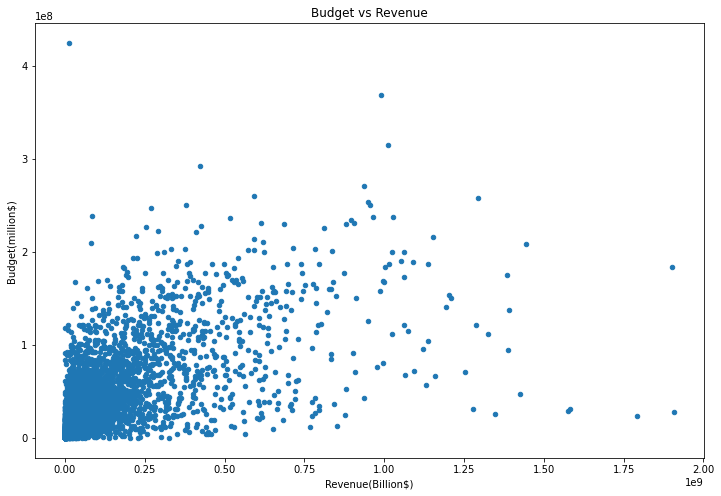

In [45]:
#scatter plot to see if theres a relationship/correlation between budget and revenue
scatterplot(df_name = budget, y = 'budget_adj', x = 'revenue_adj',
           title = 'Budget vs Revenue',
           xlab = 'Revenue(Billion$)', ylab = 'Budget(million$)')

From the chart above even though theres a **positive correlation** between **budget** and **revenue**, its not strong enough to conclude that HIGH BUDGET means HIGH REVENUE.

## 4. Does longer runtime movies take up more budget?

In [46]:
#I'll create a subset dataframe with only the columns I need to answer this question
runtime = df[['id', 'runtime', 'budget_adj']]

In [47]:
#viewing the dataset
runtime.head()

,id,runtime,budget_adj
0,135397,124,137999939
1,76341,120,137999939
2,262500,119,101199955
3,140607,136,183999919
4,168259,137,174799923


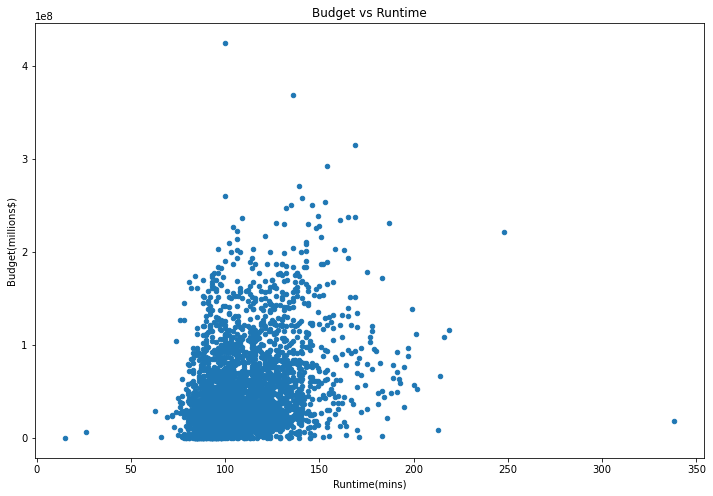

In [48]:
#scatter plot to see if theres a relationship/correlation between budget and runtime of movies
scatterplot(df_name = runtime, x = 'runtime', y = 'budget_adj',
           title = 'Budget vs Runtime',
           xlab = 'Runtime(mins)', ylab = 'Budget(millions$)')

Although theres a **positive correlation** between **budget** and **runtime** of the movies, but its not strong enough to conclude that LONGER movies take up more BUDGET.

## 5. Top 5 Production companies with the highest revenue?

In [49]:
#I'll create a copy of the data with the columns I need
production_comp = df[['production_companies', 'revenue_adj']]

In [50]:
#viewing the new dataset
production_comp.head()

,production_companies,revenue_adj
0,Universal Studios|Amblin Entertainment|Legenda...,1392445892
1,Village Roadshow Pictures|Kennedy Miller Produ...,348161292
2,Summit Entertainment|Mandeville Films|Red Wago...,271619025
3,Lucasfilm|Truenorth Productions|Bad Robot,1902723129
4,Universal Pictures|Original Film|Media Rights ...,1385748801


In [51]:
#splitting the clustered production company names into single rows
production_comp = split_category(df_name = production_comp, col_name = 'production_companies', delimeter = '|')

C:\Users\Phantom\AppData\Local\Temp/ipykernel_12744/3040909193.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_name[col_name] = df_name[col_name].str.split(delimeter)


In [52]:
#viewing the new data
production_comp

,production_companies,revenue_adj
0,Universal Studios,1392445892
0,Amblin Entertainment,1392445892
0,Legendary Pictures,1392445892
0,Fuji Television Network,1392445892
0,Dentsu,1392445892
...,...,...
10829,Laurel Productions,40308088
10835,Twentieth Century Fox Film Corporation,134360293
10835,Solar Productions,134360293
10835,Robert Wise Productions,134360293


In [53]:
#grouping the data now by the genres and getting the sum of the revenue generated for each production company
production_comp = production_comp.groupby('production_companies').sum()

In [54]:
#sorting to get the top 5
production_comp = production_comp.sort_values(by = 'revenue_adj', ascending = False)
production_comp = production_comp.head(5)

In [55]:
#viewing the top 5 profitable genres 
production_comp

,revenue_adj
production_companies,
Warner Bros.,64801480883.00000
Universal Pictures,60487954983.00000
Paramount Pictures,51624287424.00000
Twentieth Century Fox Film Corporation,42247426931.00000
Walt Disney Pictures,36678568152.00000


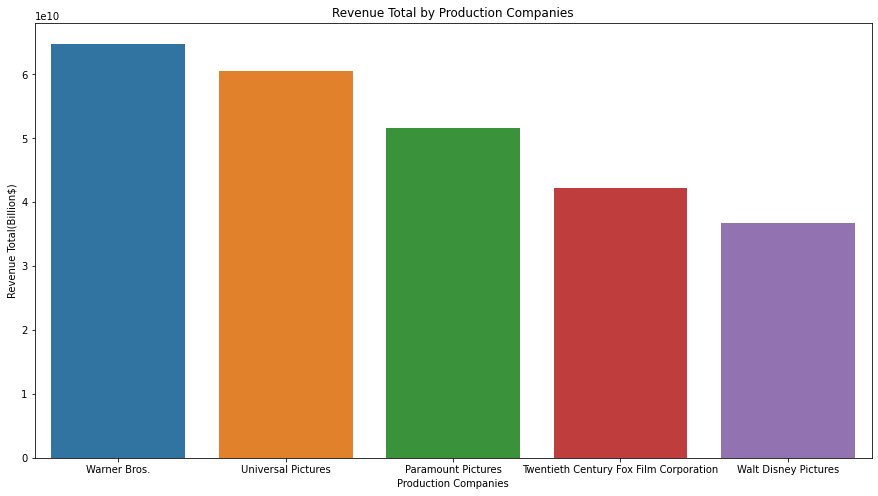

In [56]:
#creating a bar chart to represent the table above
barchart(x = production_comp.index, y = production_comp['revenue_adj'],
         title = 'Revenue Total by Production Companies',
         xlab = 'Production Companies', ylab = 'Revenue Total(Billion$)')

**WARNER BROS.** came out top of the list with 648 billion $ Total Revenue generated

<a id='conclusions'></a>
## Conclusions


After the analysis I can conclude from the results that **ADVENTURE** movies is the most profitable genre, and **STEVEN SPEILBERG** comes out on top as the best movie director although this could also be because he has produced more movies.  
It can also be seen that theres a correlation between **HIGH BUDGET** and **HIGH REVENUE** but we cant assume causality as the correlation is not strong enough and there may be other variables involve and this is the same for **LONG RUNTIME** movies and **HIGH BUDGET**.
Finally **WARNER BROS** comes out ontop as the best movie production company.  

Some limitations of this analysis is the dataset is the data quality because the dataset became short after the cleaning process as it had a lot of missing values in important columns(budget and revenue). A better analysis is certainly possible if I had a much more accurate dataset  


In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1